# Data mining for Big Data
Goal: Spammer detection on Twitter

Team: 
- BRAHMI Camil

- DARMET Théotime

- LECERF Anthony

- PHAM Duy Anh Philippe

Start: 26/12/20, end: 29/01/21

version 2.0

python 3.7.3

Libraries:
- numpy
- matplotlib
- pandas
- networkx
- imblearn
- sklearn

Importation:
* library
* dataset
* list of spammer, legitimate, unknown

Data visualisation:
* Graph model
* Plot covariance matrix
* Plot subspace of the dataset: legitimate and spammer space

Data analysis
* Correspondance between User_id and code-id
* Select relevant users features
* Applications and users relationship
* Some statistics on data

Machine Learning
* SMOTE
* KNN
* Gaussian kernal SVM
* T-SNE + Gaussian kernel SVM
* Majority vote

# Importation

In [ ]:
try:
  import gdown
  url ='https://drive.google.com/uc?id=1sxk4jt3MxE2m2M4CUWfnl63BLPZC7ubd'
  output='Social_spammers_dataset.zip'
  gdown.download(url,output, quiet=False)
  !unzip -o Social_spammers_dataset
  DRIVE_PATH='Social_spammers_dataset/'
except:
  DRIVE_PATH='Social_spammers_dataset/'

Downloading...
From: https://drive.google.com/uc?id=1sxk4jt3MxE2m2M4CUWfnl63BLPZC7ubd
To: /content/Social_spammers_dataset.zip
100%|██████████| 851k/851k [00:00<00:00, 88.8MB/s]

Archive:  Social_spammers_dataset.zip
   creating: Social_spammers_dataset/
   creating: Social_spammers_dataset/graphs/
  inflating: Social_spammers_dataset/graphs/c_combined_edges_w_2_s_0.9.csv  
   creating: Social_spammers_dataset/graphs/app_based_similarity/
   creating: Social_spammers_dataset/graphs/app_based_similarity/app_based_users_vectors/
  inflating: Social_spammers_dataset/graphs/app_based_similarity/app_based_users_vectors/app_based_users_vectors.txt  
  inflating: Social_spammers_dataset/graphs/app_based_similarity/app_based_users_vectors/normalized_app_based_users_vectors.txt  
   creating: Social_spammers_dataset/graphs/app_based_similarity/app_user_interaction_graph/
  inflating: Social_spammers_dataset/graphs/app_based_similarity/app_user_interaction_graph/weighted_app_user_edges.csv  
  inflating: Social_spammers_dataset/graphs/app_based_similarity/app_user_interaction_graph/coded_weighted_edges.csv  
  inflating: Social_spammers_dataset/graphs/app_based_similarit

In [ ]:
#General importation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# Importation for ML
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

from sklearn import svm
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data

In [ ]:
def load(filename,sepa = ',',head='infer'):
  data = pd.read_table(filename,sep=sepa , header=head)
  print(data.head(2))
  print(np.shape(np.array(data)))
  return data

### Users

In [ ]:
# Correspondance coded_id and user_id
filename=DRIVE_PATH+'users/coded_ids.csv'
coded_ids = load(filename)

   coded_id     user_id
0         1   100338945
1         2  1084425186
(767, 2)


In [ ]:
# Trainset
filename=DRIVE_PATH+'users/coded_ids_labels_train.csv'
coded_ids_labels_train = load(filename)
print('\n0 for legitimate and / 1 for spammer\n',coded_ids_labels_train['label'].value_counts())#split data: train, valide, test

   coded_id  label
0         1      1
1         2      0
(686, 2)

0 for legitimate and / 1 for spammer
 0    568
1    118
Name: label, dtype: int64


In [ ]:
# Testset (provide to the teacher)
filename=DRIVE_PATH+'users/coded_ids_labels_test.csv'
coded_ids_labels_test = load(filename)

   coded_id  label
0         5    NaN
1        26    NaN
(81, 2)


In [ ]:
# List of id depending on the label
def Glabels(coded_ids_labels_test,coded_ids_labels_train):
  legitimate=[]#0
  spammer=[]#1
  unknown=list(coded_ids_labels_test['coded_id'])
  for i in list(zip(coded_ids_labels_train['coded_id'],coded_ids_labels_train['label'])):
    id,label=i
    if label==0:
      legitimate.append(id)
    else:
      spammer.append(id)

  return legitimate,spammer,unknown
legitimate,spammer,unknown = Glabels(coded_ids_labels_test,coded_ids_labels_train)
print(np.array(legitimate).T)
print(np.array(spammer).T)
print(np.array(unknown).T)

[  2   3   6   9  10  17  19  20  21  22  23  24  27  30  31  32  33  35
  36  38  41  42  43  44  45  51  53  57  62  64  77  78  79  80  81  83
  84  87  88  89  90  93  98  99 101 102 103 104 105 106 107 113 114 117
 123 127 128 129 130 131 132 133 136 137 138 144 145 146 147 155 156 160
 165 171 172 174 180 181 187 188 191 193 195 201 202 203 204 205 206 207
 208 210 211 214 215 217 218 219 220 222 223 224 225 227 230 234 240 241
 242 247 249 250 256 257 258 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 279 280 281 282 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 304 305 306 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 324 325 327 328 329 330 332 333
 334 335 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 355 356 357 358 359 360 361 362 364 365 366 367 368 369 370 371 372
 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390
 391 392 393 394 395 396 398 399 400 401 402 403 40

### Users_features

In [ ]:
# Anonymised information (coded_id)
# We have more information about features in txt file in the same file.
filename=DRIVE_PATH+'users_features/features.csv'
users_features = load(filename)

   active_tweeting_frequency_per_day  ...  utc_offset
0                              0.055  ...    -36000.0
1                            154.333  ...         NaN

[2 rows x 145 columns]
(767, 145)


### Graphs

In [ ]:
filename=DRIVE_PATH+'graphs/c_combined_edges_w_1_s_0.9.csv'
c_combined_edges_w_1 = load(filename)

   Source  Target  Weight    Sim
0       1     168      30  0.975
1       4      56      13  0.974
(1335, 4)


In [ ]:
filename=DRIVE_PATH+'graphs/c_combined_edges_w_2_s_0.9.csv'
c_combined_edges_w_2 = load(filename)

   Source  Target  Weight    Sim
0       1     168      30  0.975
1       4      56      13  0.974
(549, 4)


#### app_based_similarity

In [ ]:
filename=DRIVE_PATH+'graphs/app_based_similarity/apps_ids.csv'
apps_ids = load(filename)

   app_id                                           app_desc
0       1  <a href="http://tweepsmap.com" rel="nofollow">...
1       2  <a href="https://www.lithium.com" rel="nofollo...
(215, 2)


In [ ]:
filename=DRIVE_PATH+'graphs/app_based_similarity/sim_matrix.txt'
sim_matrix = load(filename,head=None)

   0    1    2     3    4      5    ...    761    762    763    764    765   766
0  1.0  0.0  0.0  0.73  0.0  0.000  ...  0.001  0.006  0.014  0.016  0.014  0.02
1  0.0  1.0  0.0  0.00  0.0  0.862  ...  0.000  0.000  0.000  0.000  0.202  0.00

[2 rows x 767 columns]
(767, 767)


#### app_based_users_vectors

In [ ]:
filename=DRIVE_PATH+'graphs/app_based_similarity/app_based_users_vectors/app_based_users_vectors.txt'
app_based_users_vectors=load(filename,sepa=',|:',head=None)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


   0    1    2    3    4    5    6    ...  209  210  211  212  213  214  215
0    1  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    2  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[2 rows x 216 columns]
(767, 216)


In [ ]:
filename=DRIVE_PATH+'graphs/app_based_similarity/app_based_users_vectors/normalized_app_based_users_vectors.txt'
normalized_app_based_users_vectors = load(filename,sepa=',|:',head=None)
data_normalized_app_based_users_vectors=np.array(normalized_app_based_users_vectors) # adapt that with other norm of similarity

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


   0    1    2    3    4    5    6    ...  209  210  211  212  213  214  215
0    1  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    2  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[2 rows x 216 columns]
(767, 216)


#### app_user_interaction_graph

In [ ]:
filename=DRIVE_PATH+'graphs/app_based_similarity/app_user_interaction_graph/coded_weighted_edges.csv'
coded_weighted_edges = load(filename)

   user_id  app_id  weight
0        1      23       9
1        1      33     391
(2022, 3)


In [ ]:
filename=DRIVE_PATH+'graphs/app_based_similarity/app_user_interaction_graph/weighted_app_user_edges.csv'
weighted_app_user_edges = load(filename)

     user_id                                           app_desc  weight
0  100338945  <a href="http://twitter.com" rel="nofollow">Tw...       9
1  100338945  <a href="http://app.doneforyoutraffic.com.com"...     391
(2022, 3)


# Data visualisation

Graph plot

In [ ]:
def graph(label,source,target,weight,sim,legitimate,spammer,unknown):
  """
  plot graph model from list of label source target weight and sim
  @input
    label: list of label of the node

    *** edge ***
    source: list of source
    target: list of target
    weight: list of weight
    sim: list of sim
    label:  legitimate
            spammer
            unknown
  @output
    G: graph model
  """

  #Create graph
  G = nx.Graph()
  G.add_nodes_from(list(label))
  nx.nodes(G)
  for elem in list(zip(source,target,weight,sim)):
    #we define the value of disimilarity as a length between two nodes : less it's similar,  farther it is
    u,v,w,s=elem
    dis=1-s
    G.add_edge(u_of_edge=u,v_of_edge=v,weight=w,length=dis)
  return G

def plotgraph(G,weight,sim,legitimate=None,spammer=None,unknown=None):
  """
  plot graph model from list of label source target weight and sim
  @input
    label: list of label of the node

    *** edge ***
    source: list of source
    target: list of target
    weight: list of weight
    sim: list of sim
    label:  legitimate
            spammer
            unknown
  @output
    G: graph model
  """
  ## Position
  #pos = nx.spring_layout(G)
  pos= nx.kamada_kawai_layout(G)# take a lot of time
  #pos = nx.fruchterman_reingold_layout(G)
  
  ## nodes
  if not(legitimate is None):
    nx.draw_networkx_nodes(G,pos,
                          nodelist=legitimate,
                          node_color='g',
                          node_size=10,
                          alpha=0.8,label=legitimate)
  if not(spammer is None):
    nx.draw_networkx_nodes(G,pos,
                          nodelist=spammer,
                          node_color='r',
                          node_size=10,
                          alpha=0.8,label=spammer)
  if not(unknown is None):
    nx.draw_networkx_nodes(G,pos,
                          nodelist=unknown,
                          node_color='b',
                          node_size=10,
                          alpha=0.8,label=unknown)
  ## edges
  Ledges=[]
  for elem in list(zip(source1,target1)):
      u,v=elem
      Ledges.append((u,v))#depending on the origin of the node

  nx.draw_networkx_edges(G,pos,
                        edgelist=Ledges,
                        width=np.array(weight)/max(np.array(weight)),alpha=0.5)
  ## Plot figure
  plt.title('Users interaction')
  plt.show()

covariance plot

In [ ]:
def covmatrix2network(dataframe,title='Users interaction'):
  """
  Convert dataframe of covariance to a network
  @Input
    dataframe: dataframe of covariance matrix
  @Output
    G: network

  To Do
    - Plot label, resize node, etc etc.
    - Show the best representation of the network according to what we want to do
    - Lets user to decide his own representation

    - Clear the network: eliminate alone node, reshape space with high density of node, etc.
  """
  #extact label
  labels = dataframe.index.values

  #extract matrix value and convert
  cor_matrix = np.asmatrix(dataframe)

  #create structure of network
  G = nx.from_numpy_matrix(cor_matrix)
  G = nx.relabel_nodes(G,lambda x: labels[x])
  G.edges(data=True) #(node_parent, node child,{weight:float})

  #create network
  #https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html
  positions=nx.draw_networkx(G)#change representation of the network

  #plot network
  plt.figure(figsize=(12,12)) 
  nx.draw(G,positions, with_labels=True) #first solution
  plt.title(title)
  plt.show() 
  return G

def plotcovfeatures(matrix,titre):
  """
  plot covariance matrix
  @input:
    matrix: array
    titre: str title
  @output
    corr: covariance matrix
  """
  corr=np.corrcoef(matrix)
  plt.figure()
  plt.imshow(abs(corr))
  plt.title(titre)
  plt.show()
  return corr

Processing weight 1

In [ ]:
# Weight 1
label=coded_ids['coded_id']
source1=list(c_combined_edges_w_1['Source'])
target1=list(c_combined_edges_w_1['Target'])
weight1=list(c_combined_edges_w_1['Weight'])
sim1=list(c_combined_edges_w_1['Sim'])
G1=graph(label,source1,target1,weight1,sim1,legitimate,spammer,unknown)

In [ ]:
print(len(list(nx.nodes(G1))))#check
print(nx.number_of_edges(G1))

767
1335


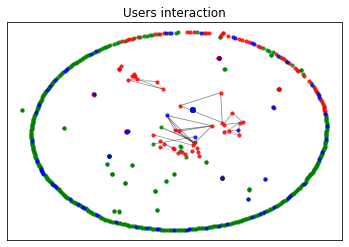

In [ ]:
plotgraph(G1,weight1,sim1,legitimate,spammer,unknown)

Processing weight 2

In [ ]:
# Weight 2
label=coded_ids['coded_id']
source2=list(c_combined_edges_w_2['Source'])
target2=list(c_combined_edges_w_2['Target'])
weight2=list(c_combined_edges_w_2['Weight'])
sim2=list(c_combined_edges_w_2['Sim'])
G2=graph(label,source2,target2,weight2,sim2,legitimate,spammer,unknown)

In [ ]:
print(len(list(nx.nodes(G2))))#check
print(nx.number_of_edges(G2))

767
549


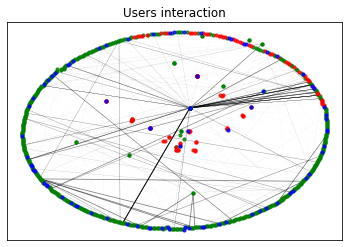

In [ ]:
plotgraph(G2,weight2,sim2,legitimate,spammer,unknown)

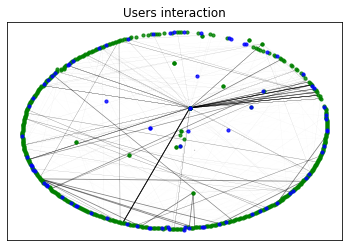

In [ ]:
plotgraph(G2,weight2,sim2,legitimate,None,unknown)

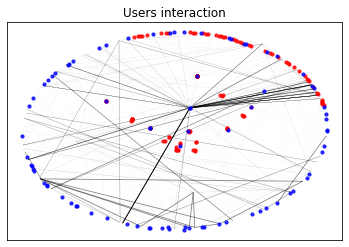

In [ ]:
plotgraph(G2,weight2,sim2,None,spammer,unknown)

## app_based_similarity

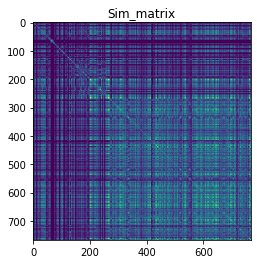

In [ ]:
data_sim_matrix=np.array(sim_matrix)
plt.imshow(data_sim_matrix)
plt.title('Sim_matrix')
plt.show()

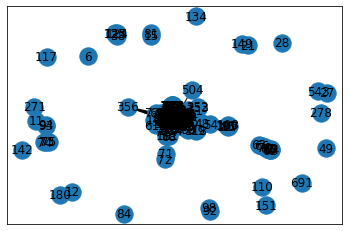

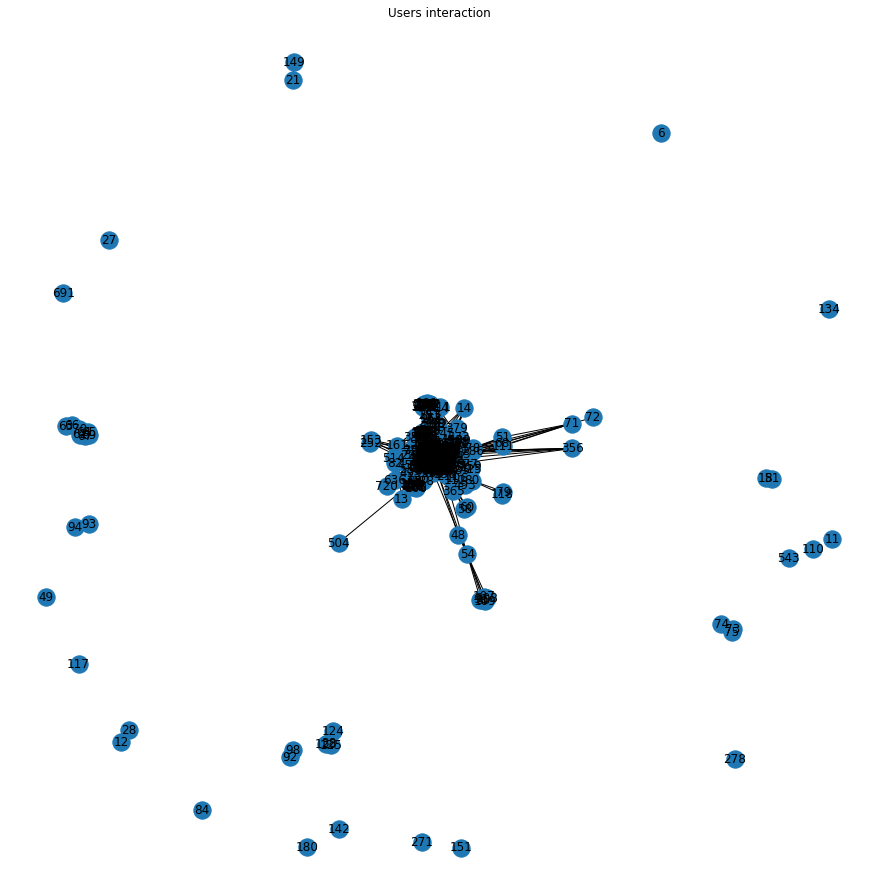

In [ ]:
G=covmatrix2network(sim_matrix)

In [ ]:
print(len(list(nx.nodes(G))))
print(nx.number_of_edges(G))

print(type(G))
print(len(G.edges()))
print(G.nodes()) 

L=nx.isolates(G)
print(L)
H=G.remove_nodes_from(L)
print(type(H),H)

767
148464
<class 'networkx.classes.graph.Graph'>
148464
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

## app_based_users_vectors and app_user_interaction_graph

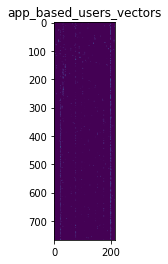

1.0


In [ ]:
plt.imshow(data_normalized_app_based_users_vectors[:,1:])
plt.title('app_based_users_vectors')
plt.show()
print(np.max(data_normalized_app_based_users_vectors[:,1:]))#check normalisation

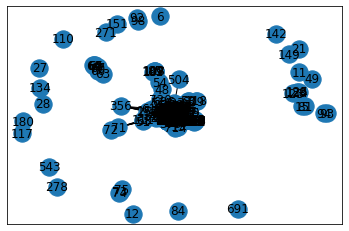

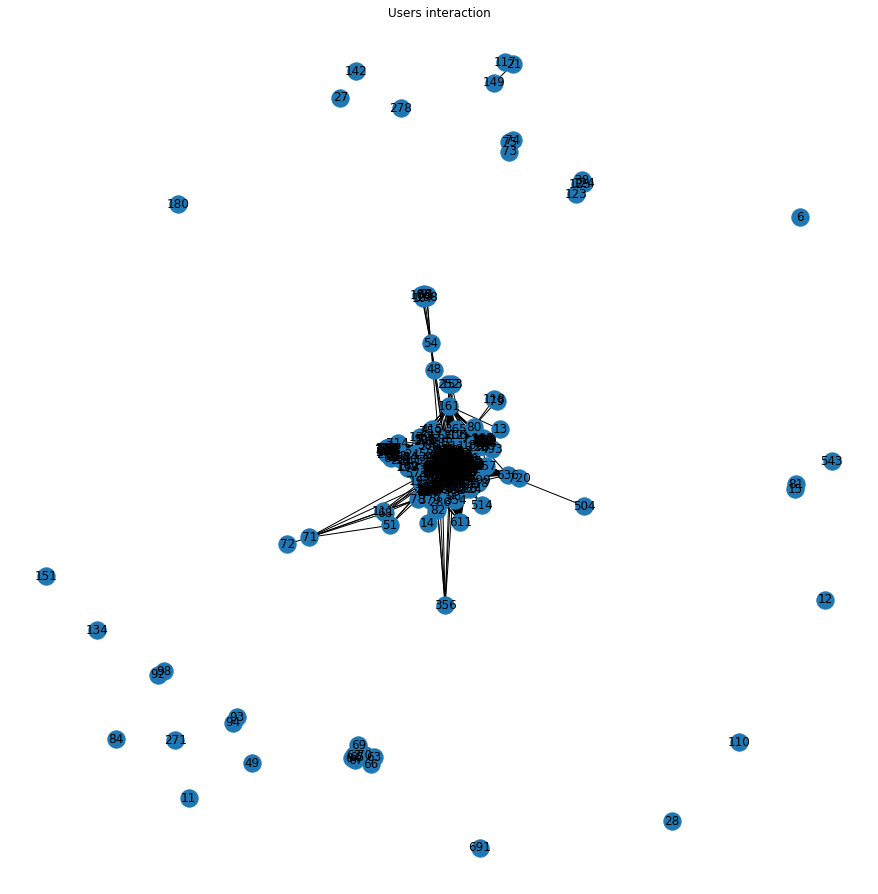

In [ ]:
Gall=covmatrix2network(pd.DataFrame(np.dot(data_normalized_app_based_users_vectors[:,1:],data_normalized_app_based_users_vectors[:,1:].T)))#user

(118, 215)


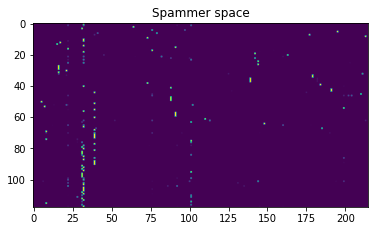

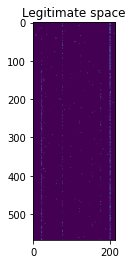

In [ ]:
Lleg_apps_ids=[]
Lspam_apps_ids=[]
for i in legitimate:
  Lleg_apps_ids.append(np.array(normalized_app_based_users_vectors.iloc[i-1,1:]))

for j in spammer:
  Lspam_apps_ids.append(np.array(normalized_app_based_users_vectors.iloc[j-1,1:]))

print(np.shape(Lspam_apps_ids))


Lspam_apps_ids=np.stack(Lspam_apps_ids, axis=0)
plt.figure()
plt.imshow(Lspam_apps_ids)
plt.title('Spammer space')
plt.show()

Lleg_apps_ids=np.stack(Lleg_apps_ids, axis=0)
plt.figure()
plt.imshow(Lleg_apps_ids)
plt.title('Legitimate space')
plt.show()

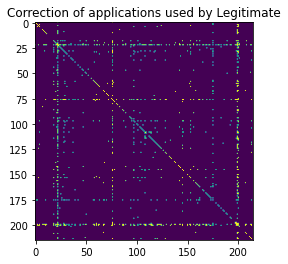

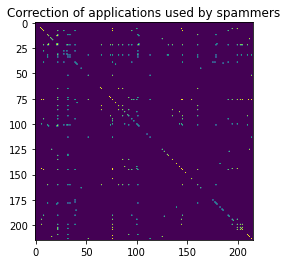

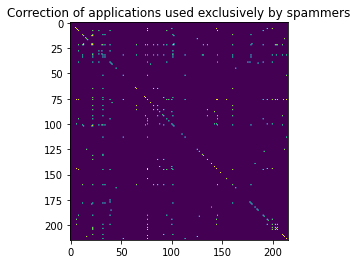

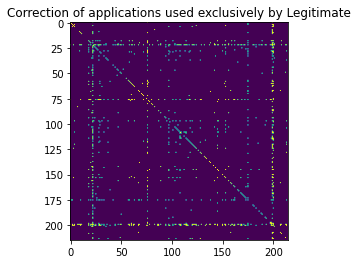

In [ ]:
Lcorr=np.dot(Lleg_apps_ids.T,Lleg_apps_ids)
Lcorr=Lcorr/np.amax(Lcorr)

plt.figure()
plt.imshow(Lcorr>0)
plt.title('Correction of applications used by Legitimate')
plt.show()

Scorr=np.dot(Lspam_apps_ids.T,Lspam_apps_ids)
Scorr=Scorr/np.amax(Scorr)

plt.figure()
plt.imshow(Scorr>0)
plt.title('Correction of applications used by spammers')
plt.show()

# Discrover relevant features which can caracterise spammer and legitimate
Scorr=np.dot(Lspam_apps_ids.T,Lspam_apps_ids)
plt.figure()
plt.imshow((Scorr-Lcorr)>0)#lul same image of Scorr
plt.title('Correction of applications used exclusively by spammers')
plt.show()

Scorr=np.dot(Lspam_apps_ids.T,Lspam_apps_ids)
plt.figure()
plt.imshow((Scorr-Lcorr)<0)#lul same image of Scorr
plt.title('Correction of applications used exclusively by Legitimate')
plt.show()

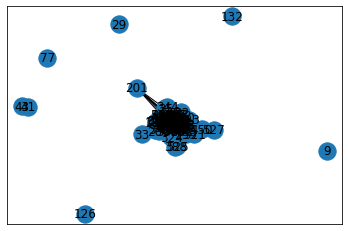

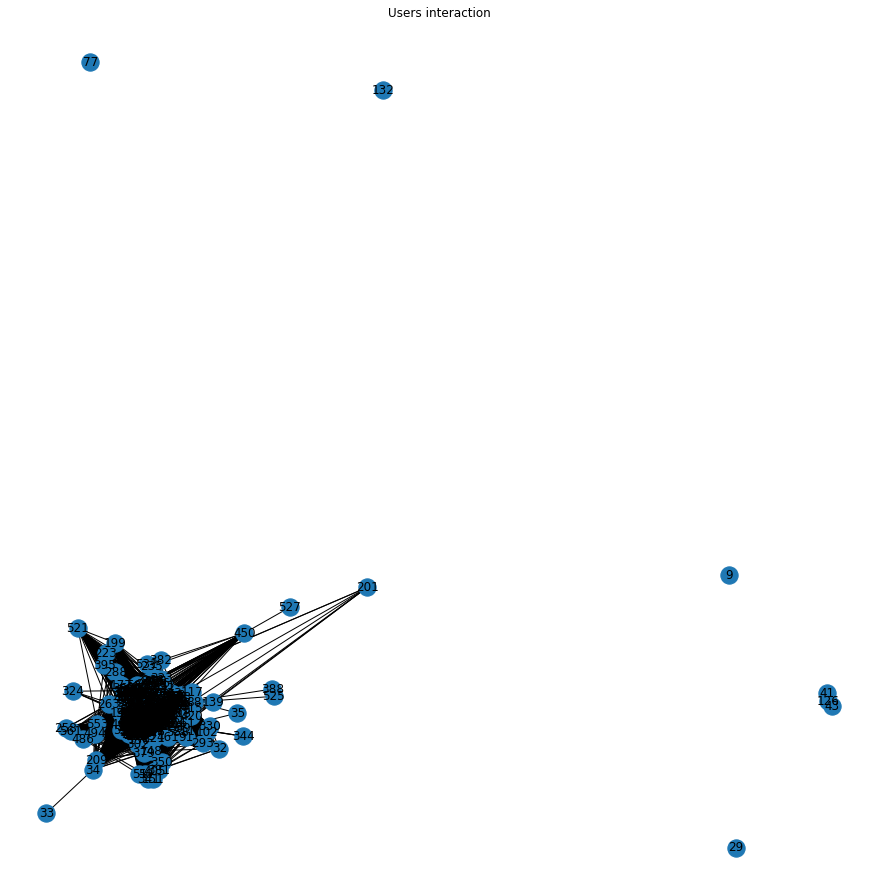

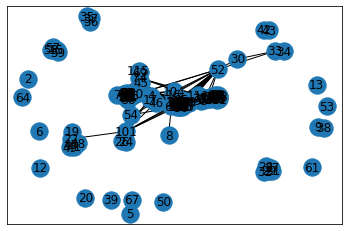

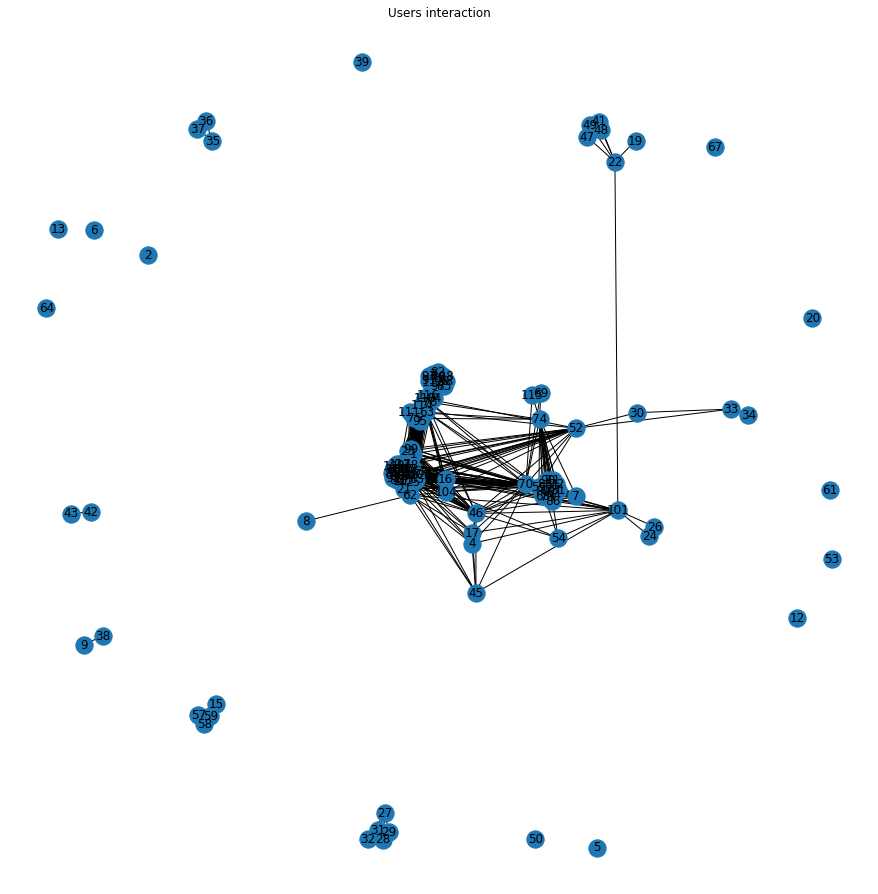

In [ ]:
G2=covmatrix2network(pd.DataFrame(np.dot(Lleg_apps_ids,Lleg_apps_ids.T)))#legitimate
G3=covmatrix2network(pd.DataFrame(np.dot(Lspam_apps_ids,Lspam_apps_ids.T)))#spammer

# Data analysis

## Users

In [ ]:
def id2user(id,datafram):
  """
  return the identity behind the id
  @Input:
    coded_id: int
    datafram: table of equivalence
  @Output
    user_id: int
  """
  return  datafram["user_id"][id-1]
id2user(1,coded_ids)

def user2id(users_features,coded_ids):
  """
  return the id from user_id
  @Input:
    users_features: dataframe with user_features
    coded_ids: table of equivalence
  @Output
    retour: list of correspondance label
  """
  retour=[]
  for i in range(0,np.shape(users_features)[0]):
    user=users_features['user_id'][i]
    id=coded_ids.loc[coded_ids["user_id"] == user]
    retour.append(int(id['coded_id']))
  return retour

In [ ]:
print(len(legitimate),len(spammer),len(unknown),len(legitimate)+len(spammer)+len(unknown))#verification
print("Legitimate proportion",1-np.shape(spammer)[0]/(np.shape(spammer)[0]+np.shape(legitimate)[0]))

568 118 81 767
Legitimate proportion 0.8279883381924198


In [ ]:
print(user2id(users_features,coded_ids))
print(list(users_features["user_id"]))#okay
print(coded_ids)

[203, 112, 138, 148, 182, 135, 243, 258, 161, 166, 79, 107, 82, 34, 223, 21, 236, 224, 158, 134, 124, 197, 252, 65, 98, 144, 18, 51, 256, 141, 117, 152, 46, 25, 264, 246, 227, 199, 186, 189, 114, 47, 126, 28, 97, 81, 187, 22, 214, 140, 2, 133, 210, 222, 52, 122, 30, 173, 156, 29, 162, 170, 201, 115, 38, 86, 194, 33, 191, 212, 234, 226, 242, 219, 61, 83, 60, 216, 231, 175, 185, 75, 221, 40, 26, 42, 229, 123, 109, 66, 6, 116, 167, 235, 164, 260, 37, 84, 105, 208, 137, 45, 108, 20, 99, 225, 253, 104, 96, 154, 145, 178, 32, 14, 168, 247, 142, 261, 146, 211, 215, 157, 90, 91, 129, 17, 237, 255, 195, 130, 43, 179, 172, 218, 16, 62, 174, 181, 228, 41, 36, 120, 101, 251, 31, 149, 125, 95, 119, 68, 106, 12, 89, 136, 151, 205, 147, 63, 239, 24, 13, 54, 160, 72, 80, 110, 59, 100, 245, 241, 1, 71, 200, 150, 35, 254, 262, 250, 238, 193, 64, 67, 159, 92, 27, 220, 183, 153, 206, 39, 132, 131, 248, 74, 103, 76, 55, 213, 207, 267, 15, 165, 10, 73, 198, 53, 265, 249, 88, 233, 58, 9, 202, 48, 176, 184, 4

## Users_features

In [ ]:
def formatdataarray(list_trie,datafram):
  """
  return array a category
  @Input:
    list_trie: list of index
    datafram: features datafram
  @Output
    retour: features array after selection
  """
  try:
    retour=[]
    for i in list_trie:
      user=id2user(i,coded_ids)
      a=datafram.loc[datafram["user_id"] == user]
      del a['user_id']
      [a]=list(a.values)
      retour.append(a)  
    retour=np.stack(retour, axis=0)
  except:
    print('Already done relaunch all the code')
  return retour

Features reductions

step 1

In [ ]:
# We made a copy of the datafram
init=users_features.copy()
init.head()
print(np.shape(init))
#equivalence in second
del init['avg_intertweet_times']
del init['max_intertweet_times']
del init['min_intertweet_times']
del init['std_intertweet_times']

# zero_value or not present in the unknown set
del init['mean_nb_symbols_per_word_in_the_tweet']
del init['median_nb_symbols_per_tweet']
del init['median_nb_symbols_per_word_in_the_tweet']
del init['min_nb_symbols_per_tweet']
del init['min_nb_symbols_per_word_in_the_tweet']
del init['min_nb_favourites_per_tweet']
del init['min_nb_mentions_per_tweet']
del init['min_nb_mentions_per_word_in_the_tweet']
del init['min_nb_hashtags_per_word_in_the_tweet']
del init['min_nb_hashtags_per_tweet']

#no representative: due to the fact the dataset is generated in a time, and in a location
del init['date_newest_tweet']
del init['date_oldest_tweet']
del init['lang']
del init['spam_in_screen_name']
del init['time_zone']
del init['utc_offset']

# arbitry delected
del init['default_profile']
del init['default_profile_image']

print(np.shape(init))
features=init.copy()

(767, 145)
(767, 123)


In [ ]:
Se_features=formatdataarray(spammer,init)
Le_features=formatdataarray(legitimate,init)
Ue_features=formatdataarray(unknown,init)
try:
  del init['user_id']
except:
  print('Already done all the code')

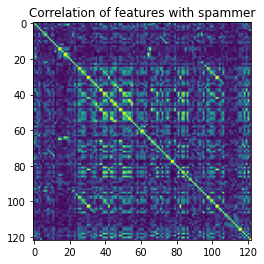

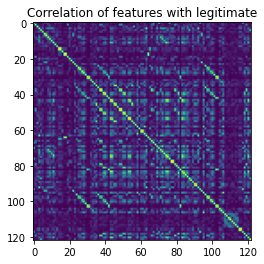

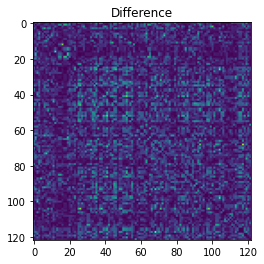

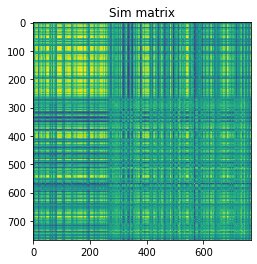

In [ ]:
Sfe_corr=plotcovfeatures(Se_features.T,'Correlation of features with spammer')
Lfe_corr=plotcovfeatures(Le_features.T,'Correlation of features with legitimate')

plt.figure()
plt.imshow(abs(abs(Lfe_corr)-abs(Sfe_corr)))
plt.title('Difference')
plt.show()

sim=plotcovfeatures(init.values,'Sim matrix')

Features reductions

step 2

In [ ]:
def cleancovmatrix(dataframe,threshold=0.3):
  """
  clean irrelevant value of covariance matrix
  @Input:
    dataframe: dataframe to clean
    threshold: threshold to select the most relevant value
  @Output:
    dataframe: dataframe cleaned
    temp: temp variable
    columns_name: new column name of features
  """
  corr_matrix = dataframe.corr().abs()
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  to_drop = [column for column in upper.columns if any(upper[column] > threshold)]#change number reduce nb of features

  print('Drop out: ',to_drop)
  print(np.shape(to_drop))
  temp=dataframe.drop(dataframe[to_drop], axis=1)
  columns_name=temp.columns
  print(columns_name)
  try:
    to_drop.remove("user_id")
    dataframe=dataframe.drop(dataframe[to_drop], axis=1)
  except:
    print('to_drop.remove("user_id") already done')
  return dataframe,temp,columns_name

In [ ]:
def preprocessing(features,threshold=0.3):
  dataframe,temp,columns_name=cleancovmatrix(features,threshold)
  S_features=formatdataarray(spammer,dataframe)
  L_features=formatdataarray(legitimate,dataframe)
  U_features=formatdataarray(unknown,dataframe)

  print(np.shape(dataframe))#with user_id
  print(np.shape(S_features),np.shape(L_features),np.shape(U_features))
  return S_features,L_features,U_features

In [ ]:
dataframe,temp,columns_name=cleancovmatrix(features)
S_features,L_features,U_features=preprocessing(features,threshold=0.3)

Drop out:  ['age', 'content_duration_days', 'diversity_index_of_hashtags', 'diversity_index_of_sources', 'followers_count_minus_2002', 'friends_count_minus_2002', 'hashtags_used_on_average', 'len_description', 'max_intertweet_times_seconds', 'max_nb_hashtags_per_tweet', 'max_nb_hashtags_per_word_in_the_tweet', 'max_nb_mentions_per_tweet', 'max_nb_mentions_per_word_in_the_tweet', 'max_nb_symbols_per_word_in_the_tweet', 'max_nb_words_per_tweet', 'mean_nb_characters_per_tweet', 'mean_nb_favourites_per_tweet', 'mean_nb_hashtags_per_tweet', 'mean_nb_hashtags_per_word_in_the_tweet', 'mean_nb_mentions_per_tweet', 'mean_nb_mentions_per_word_in_the_tweet', 'mean_nb_retweets_per_tweet', 'mean_nb_symbols_per_tweet', 'mean_nb_urls_per_tweet', 'mean_nb_urls_per_word_in_the_tweet', 'mean_nb_words_per_tweet', 'median_nb_characters_per_tweet', 'median_nb_favourites_per_tweet', 'median_nb_hashtags_per_tweet', 'median_nb_hashtags_per_word_in_the_tweet', 'median_nb_mentions_per_tweet', 'median_nb_mention

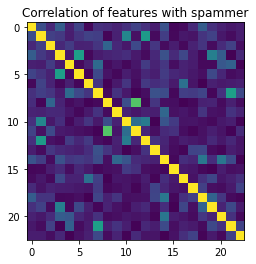

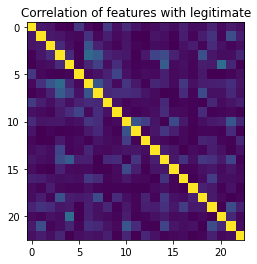

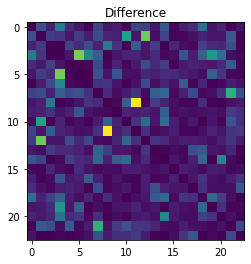

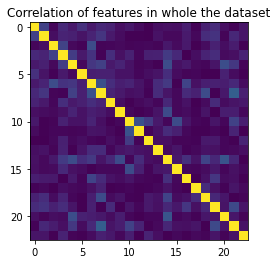

In [ ]:
Sf_corr=plotcovfeatures(S_features.T,'Correlation of features with spammer')
Lf_corr=plotcovfeatures(L_features.T,'Correlation of features with legitimate')

plt.figure()
plt.imshow(abs(abs(Lf_corr)-abs(Sf_corr)))
plt.title('Difference')
plt.show()
Ff_corr=plotcovfeatures(temp.values.T,'Correlation of features in whole the dataset')

User interaction

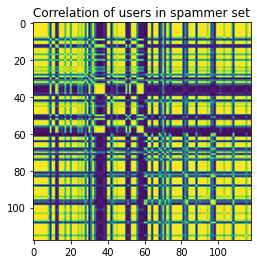

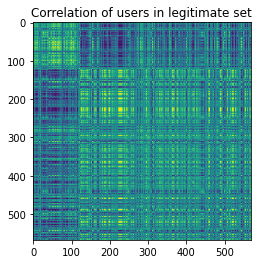

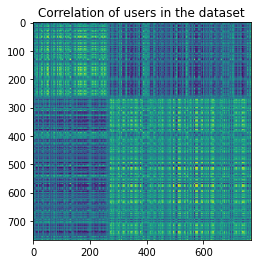

In [ ]:
Sf_corr=plotcovfeatures(S_features,'Correlation of users in spammer set')
Lf_corr=plotcovfeatures(L_features,'Correlation of users in legitimate set')
Ff_corr=plotcovfeatures(temp,'Correlation of users in the dataset')

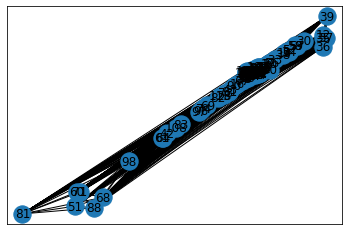

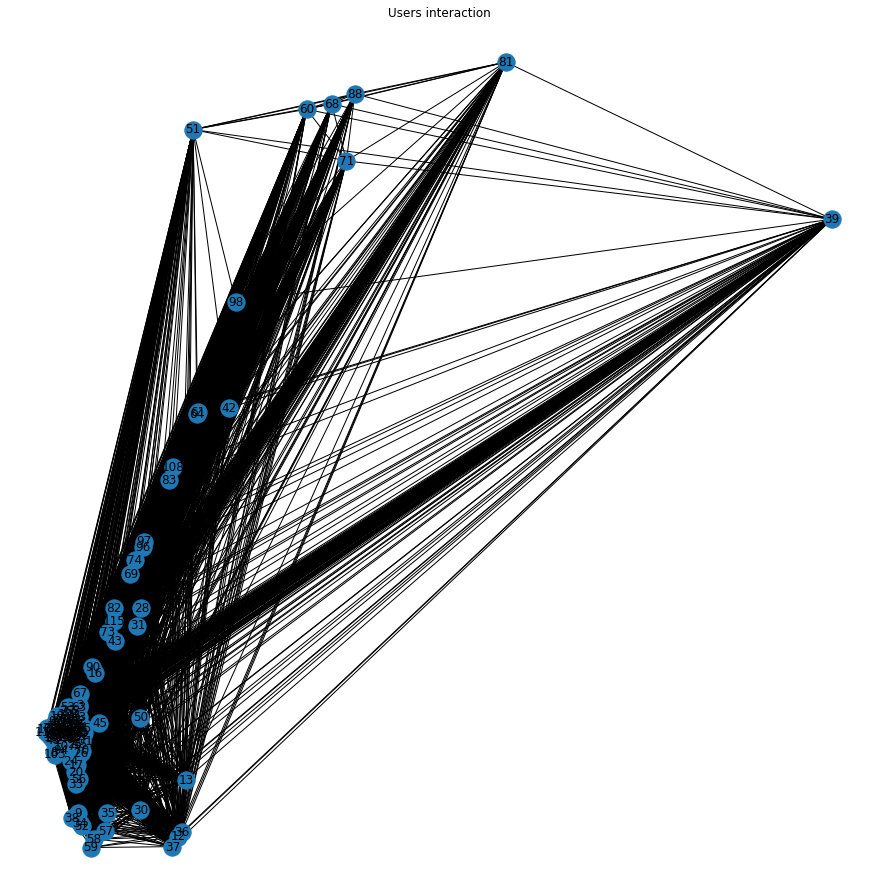

In [ ]:
Gfeatures=covmatrix2network(pd.DataFrame(Sf_corr)) #when sim matrix should be simpler

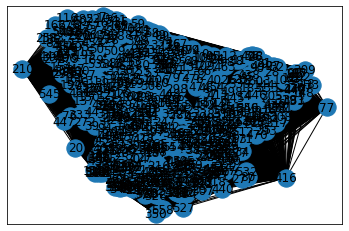

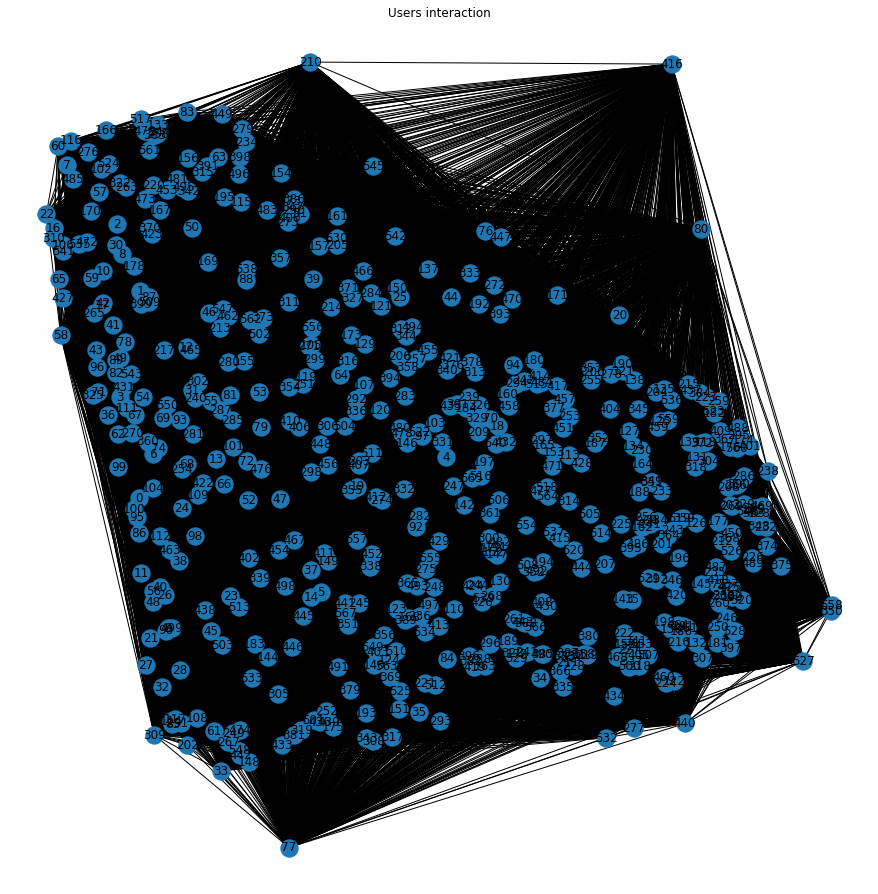

In [ ]:
Gfeatures=covmatrix2network(pd.DataFrame(Lf_corr))

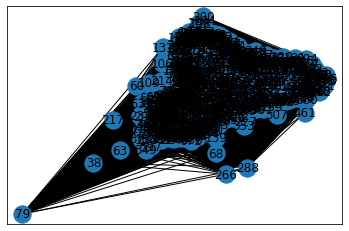

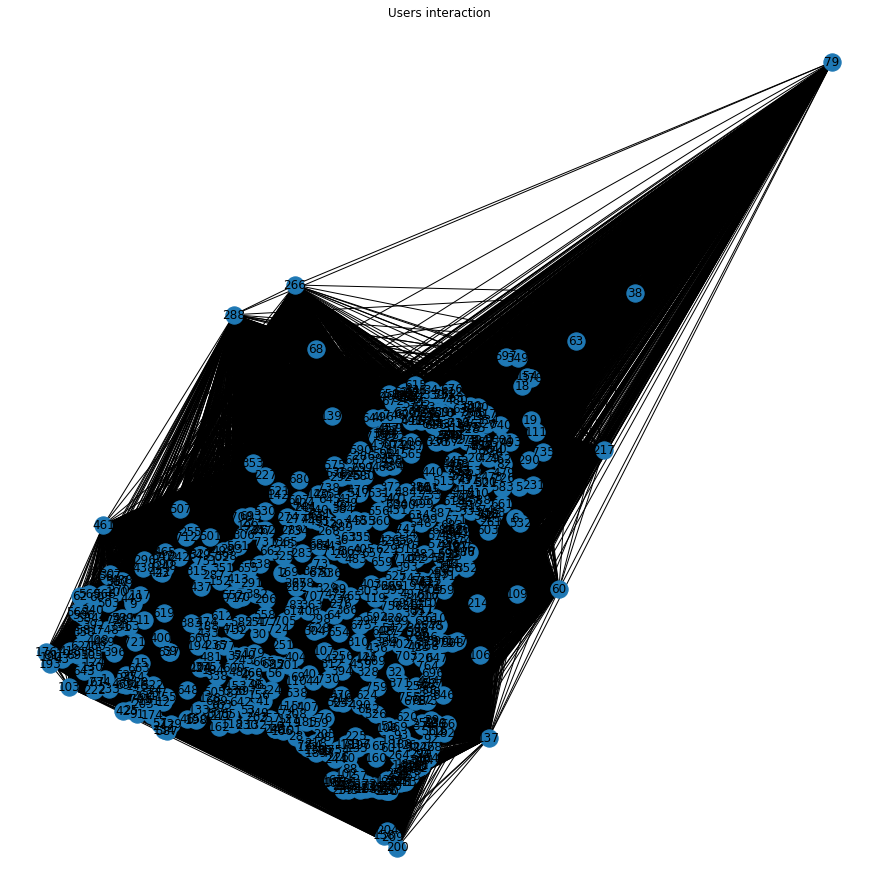

In [ ]:
Gfeatures=covmatrix2network(pd.DataFrame(Ff_corr))

## app_based_users_vectors

Fist approach: global analysis

In [ ]:
somme=np.sum(data_normalized_app_based_users_vectors[:,1:],axis=0)# compute sum of frequency
print('The most common origin of a tweet is:',apps_ids["app_desc"][np.argmax(somme)],'with the score:',np.max(somme))#distribution of origin of tweet 
print('The least common origin of a tweet is:',apps_ids["app_desc"][np.argmin(somme)],'with the score:',np.min(somme))#distribution of origin of tweet 

The most common origin of a tweet is: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> with the score: 256.37
The least common origin of a tweet is: <a href="http://stocktwits.com" rel="nofollow">StockTwits Web</a> with the score: 0.0


In [ ]:
liste_null = np.argwhere(somme == np.min(somme))# list of irrelevant features: we have analyse that as a text mining (any correspondance)
print('The least common origin of a tweet come from:')
for i in liste_null:
  print(apps_ids["app_desc"][i])
print('with the score:',np.min(somme))
print(len(liste_null))

The least common origin of a tweet come from:
14    <a href="http://stocktwits.com" rel="nofollow"...
Name: app_desc, dtype: object
38    <a href="http://www.opendorse.com" rel="nofoll...
Name: app_desc, dtype: object
48    <a href="https://live.line.me/" rel="nofollow"...
Name: app_desc, dtype: object
51    <a href="http://wowthemjewelry.com/" rel="nofo...
Name: app_desc, dtype: object
53    <a href="http://knz.so" rel="nofollow">\u0643\...
Name: app_desc, dtype: object
54    <a href="http://www.apple.com/" rel="nofollow"...
Name: app_desc, dtype: object
56    <a href="https://login.slashdot.org/" rel="nof...
Name: app_desc, dtype: object
69    <a href="http://www.younow.com" rel="nofollow"...
Name: app_desc, dtype: object
84    <a href="http://www.saviapps.com/friendcheck" ...
Name: app_desc, dtype: object
96    <a href="http://www.cloudhopper.com/" rel="nof...
Name: app_desc, dtype: object
99    <a href="http://tweetglide.com/" rel="nofollow...
Name: app_desc, dtype: object
111    <

In [ ]:
threshold=0.15
liste_main = np.argwhere(somme/np.max(somme) >= threshold)# list of irrelevant features: we have analyse that as a text mining (stop word)
print('The most common origin of a tweet come from:')
for i in liste_main:
  print(apps_ids["app_desc"][i])
print('with the least score at:',np.max(somme)*threshold)

The most common origin of a tweet come from:
22    <a href="http://twitter.com" rel="nofollow">Tw...
Name: app_desc, dtype: object
76    <a href="http://twitter.com/download/android" ...
Name: app_desc, dtype: object
199    <a href="http://twitter.com/download/iphone" r...
Name: app_desc, dtype: object
200    <a href="https://about.twitter.com/products/tw...
Name: app_desc, dtype: object
with the least score at: 38.4555


Second approach: statistic

In [ ]:
#Compute mean
leg_apps_ids=np.mean(Lleg_apps_ids, axis=0)
spam_apps_ids=np.mean(Lspam_apps_ids, axis=0)

# Compute variance
varleg_apps=np.var(Lleg_apps_ids,axis=0)
varspam_apps=np.var(Lspam_apps_ids,axis=0)
#Variance between each column inside the same group
print(np.max(varleg_apps))
print(np.max(varspam_apps))

#Check
print(np.shape(normalized_app_based_users_vectors))
print(np.max(leg_apps_ids))
print(np.max(spam_apps_ids))

0.16913892456853855
0.14434490807239306
(767, 216)
0.4067253521126758
0.20991525423728816


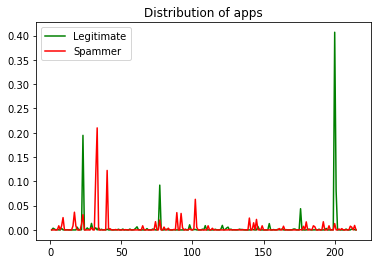

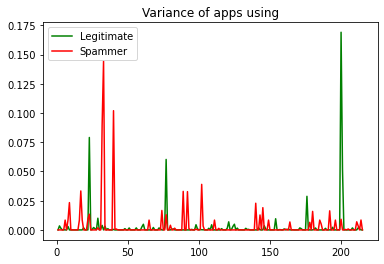

In [ ]:
# Analyse behavious as a function of source
plt.figure()
plt.plot( list(range(1,216)), leg_apps_ids, color='g',label='Legitimate')
plt.plot(list(range(1,216)), spam_apps_ids,color='r',label='Spammer')
plt.legend()
plt.title('Distribution of apps')
plt.show()

plt.figure()
plt.plot( list(range(1,216)), varleg_apps, color='g',label='Legitimate')
plt.plot(list(range(1,216)), varspam_apps,color='r',label='Spammer')
plt.legend()
plt.title('Variance of apps using')
plt.show()

In [ ]:
# Brut correspondance
Lapp=[]
for counter, value in enumerate(leg_apps_ids):
  if value>0:
    Lapp.append((value,counter))

Sapp=[]
for counter, value in enumerate(spam_apps_ids):
  if value>0:
    Sapp.append((value,counter))

#No null list
print(np.shape(Lapp))
print(np.shape(Sapp))

# Sort
Lapp=sorted(Lapp, key=lambda x: x[0],reverse=True)
Sapp=sorted(Sapp, key=lambda x: x[0],reverse=True)


print("***Legitimate***")
for i in Lapp[:5]:
  f,id_app=i
  print(id_app)
  print(apps_ids["app_desc"][id_app],f)

print("***Spammer***")
for i in Sapp[:5]:
  f,id_app=i
  print(id_app)
  print(apps_ids["app_desc"][id_app],f)

(137, 2)
(70, 2)
***Legitimate***
199
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> 0.4067253521126758
22
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a> 0.19459507042253532
76
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a> 0.09216549295774643
200
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a> 0.08045774647887322
175
<a href="http://www.hootsuite.com" rel="nofollow">Hootsuite</a> 0.0436619718309859
***Spammer***
32
<a href="http://app.doneforyoutraffic.com.com" rel="nofollow">Done For You Traffic</a> 0.20991525423728816
39
<a href="https://ifttt.com" rel="nofollow">IFTTT</a> 0.1223728813559322
31
<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a> 0.11372881355932205
101
<a href="http://www.google.com/" rel="nofollow">Google</a> 0.06296610169491526
16
<a href="http://www.top-f3.com/rt" rel="nofollow">\u0631\u064a\u062a\u0648\u064a\u062a\u0640 \u0627\u0

In [ ]:
#Clean correspondance : majority selection (OR, we probably can us XOR if a threshold)
Lapp=[]
Sapp=[]
biais=[]
for counter, value in enumerate(zip(leg_apps_ids,spam_apps_ids)):
  l,s=value
  if l>s:
    Lapp.append((counter,l))
  else:
    Sapp.append((counter,s))

  if min(l,s)==l:
    coef=-1 #spammer uper legitimate
  else:
    coef=1 #legitimate uper spammer
  b=coef*min(l,s)/(l+s)
  biais.append((counter,b))

# Sort
Lapp=sorted(Lapp, key=lambda x: x[1],reverse=True)
Sapp=sorted(Sapp, key=lambda x: x[1],reverse=True)

print("***Legitimate***")
for i in Lapp[:10]:
  id_app,f=i
  print(id_app)
  print(apps_ids["app_desc"][id_app],f)

print("***Spammer***")
for i in Sapp[:10]:
  id_app,f=i
  print(id_app)
  print(apps_ids["app_desc"][id_app],f)

***Legitimate***
199
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> 0.4067253521126758
22
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a> 0.19459507042253532
76
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a> 0.09216549295774643
200
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a> 0.08045774647887322
175
<a href="http://www.hootsuite.com" rel="nofollow">Hootsuite</a> 0.0436619718309859
28
<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a> 0.013415492957746477
153
<a href="http://bufferapp.com" rel="nofollow">Buffer</a> 0.013045774647887325
97
<a href="http://instagram.com" rel="nofollow">Instagram</a> 0.010545774647887318
120
<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for i\u039fS</a> 0.009348591549295774
108
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a> 0.008820422535211264
***Spammer***

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


### Spammer

In [ ]:
Sbiais=[]
Spreselected=[]
for i in biais:#if i[1]<0 : s>l
  if (i[0] in np.array(Sapp)[:,0]):# or (i[0] in np.array(Lapp)[:10,0]) # we are interesting about the spammer detection so we only study biais in this way
    Sbiais.append(i)
    if i[1]<=0 and abs(i[1])<0.05:# 5% biais
     Spreselected.append(i[0])
print('Spammer list:', np.shape(np.array(Sapp)))
print('Biais', Sbiais)
print('Spammer selected',np.shape(Spreselected))

Sselected=[]
Sselected_biais=[]
for i in Sapp:
  if i[0] in Spreselected:
    Sselected.append(i[0])
    Sselected_biais.append(i[1])
print('The most relevent features to detect spammer are:',Sselected)

Spammer list: (95, 2)
Biais [(5, -0.0), (6, -0.0), (7, -0.2754547541903717), (8, -0.000694321859370403), (12, -0.0), (13, -0.0), (14, nan), (15, -0.0), (16, -0.0), (17, -0.0), (21, -0.025130916288742446), (31, -0.036684679584068416), (32, -0.0), (34, -0.0), (38, nan), (39, -0.011378538918460234), (40, -0.0), (41, -0.0), (43, nan), (45, -0.0), (48, nan), (51, nan), (52, -0.191869918699187), (53, nan), (54, nan), (56, nan), (64, -0.0), (65, -0.0), (66, nan), (69, nan), (73, -0.0), (74, -0.0), (79, -0.0), (82, -0.0), (84, nan), (85, nan), (86, -0.3118942731277533), (88, -0.0), (90, nan), (91, -0.0), (92, -0.0), (95, -0.06476399560922064), (96, nan), (99, nan), (100, -0.22160186783067706), (101, -0.014874088460209713), (102, -0.0), (110, -0.0), (111, nan), (113, -0.010280536678863913), (125, -0.0), (127, -0.0), (130, -0.0), (131, -0.0), (135, -0.0), (136, nan), (139, -0.0), (140, nan), (142, -0.017693984045424556), (144, -0.0), (147, nan), (148, -0.0), (149, nan), (151, nan), (154, -0.0), 

(95, 2)
(95, 118)
1.0


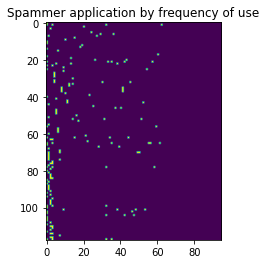

In [ ]:
Lspambis_apps_ids=[]
#Correlation between spammer and app
#for i in np.array(Sapp)[:10,0]:
for i in np.array(Sapp)[:,0]:
  i=int(i)
  Lspambis_apps_ids.append(Lspam_apps_ids[:,i])

print(np.shape(Sapp))
print(np.shape(Lspambis_apps_ids))

Lspambis_apps_ids=np.stack(Lspambis_apps_ids, axis=0).T
Lspambis_apps_ids=Lspambis_apps_ids/np.max(np.ravel(Lspambis_apps_ids))
print(np.amax(Lspambis_apps_ids))#check normalisation
plt.figure()
plt.imshow(Lspambis_apps_ids>0)
plt.title('Spammer application by frequency of use')
plt.show()

3th approach: covariance

1.0
0.0


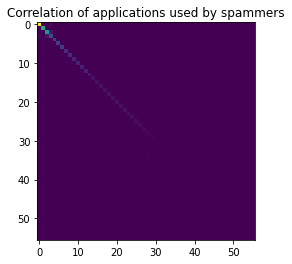

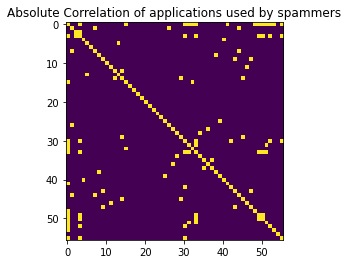

In [ ]:
Lspamtris_apps_ids=[]
for i in Sselected:
  Lspamtris_apps_ids.append(Lspam_apps_ids[:,i])
Lspamtris_apps_ids=np.stack(Lspamtris_apps_ids, axis=0)

corr=np.dot(Lspamtris_apps_ids,Lspamtris_apps_ids.T)
corr=corr/np.amax(corr)
#Check
print(np.amax(corr))
print(np.min(corr))

plt.figure()
plt.imshow(corr)
plt.title('Correlation of applications used by spammers')
plt.show()

plt.figure()
plt.imshow(corr>0)
plt.title('Absolute Correlation of applications used by spammers')
plt.show()

1.0
0.0


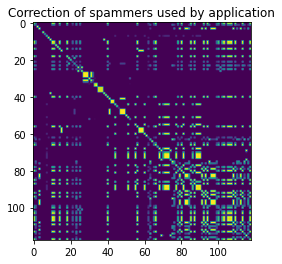

We can identify at least 5 categories of spammer


In [ ]:
corr=np.dot(Lspamtris_apps_ids.T,Lspamtris_apps_ids)
corr=corr/np.amax(corr)
#Check
print(np.amax(corr))
print(np.min(corr))

plt.figure()
plt.imshow(corr)
plt.title('Correction of spammers used by application')
plt.show()

print('We can identify at least 5 categories of spammer')

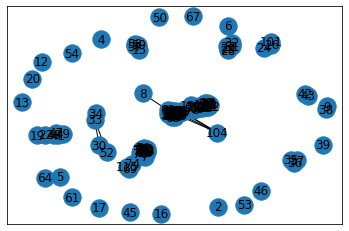

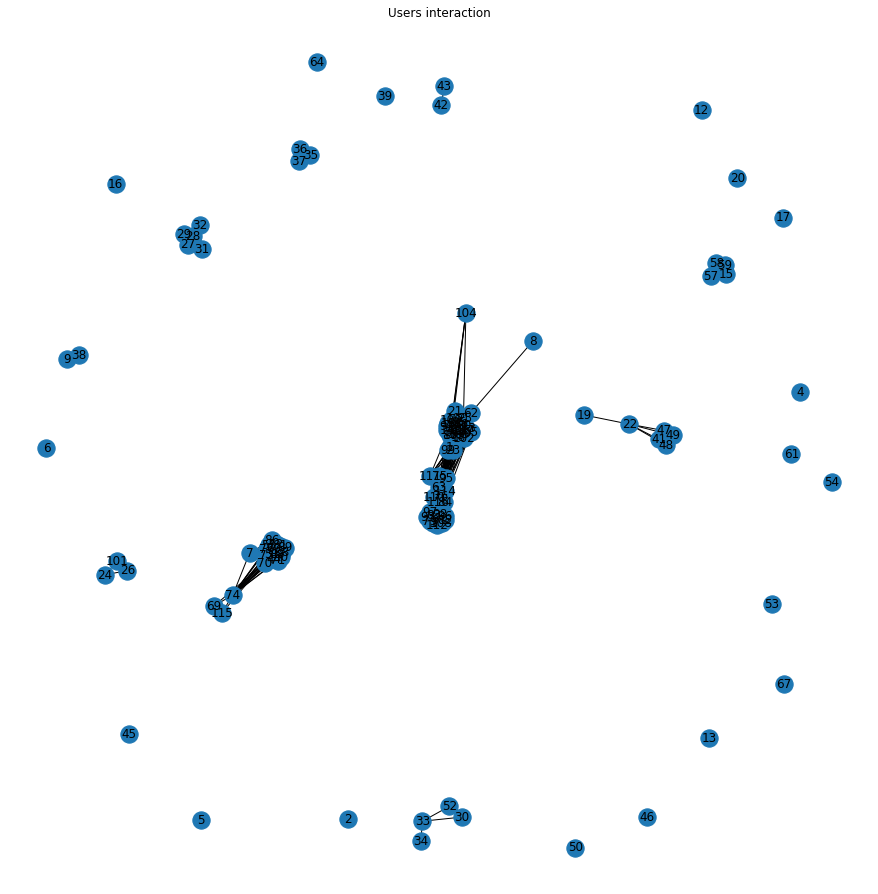

In [ ]:
G2=covmatrix2network(pd.DataFrame(corr))

## Features augmentation

In [ ]:
legitimate,spammer,unknown = Glabels(coded_ids_labels_test,coded_ids_labels_train)

In [ ]:
temp=pd.merge(coded_ids,normalized_app_based_users_vectors.rename(columns={0: "coded_id"}))
column=list(np.array(Sselected[:4])+1)
column.insert(0,"user_id")
print(column)

['user_id', 33, 40, 32, 102]


In [ ]:
temp1=temp[column]

In [ ]:
# In spammer label
Saddapp=temp1.iloc[np.array(spammer)-1]
print(Saddapp)
Saddapp.describe()

                user_id    33   40    32   102
0             100338945  0.98  0.0  0.00  0.00
3            1132049448  0.42  0.0  0.00  0.36
6            1232672382  0.00  0.0  0.00  0.00
7             124108741  0.00  0.0  1.00  0.00
10           1306310407  0.00  0.0  0.00  0.00
..                  ...   ...  ...   ...   ...
250  821367703051046912  1.00  0.0  0.00  0.00
251  822789018379284482  0.00  0.0  0.24  0.76
252  824395700750454784  0.00  0.0  0.00  0.00
253  835458745756971010  0.00  0.0  0.58  0.42
259           876624336  0.92  0.0  0.00  0.01

[118 rows x 5 columns]


user_id          33          40          32         102
count  1.180000e+02  118.000000  118.000000  118.000000  118.000000
mean   9.215750e+16    0.209915    0.122373    0.113729    0.062966
std    2.526647e+17    0.381548    0.320781    0.300924    0.198272
min    3.304621e+07    0.000000    0.000000    0.000000    0.000000
25%    1.372847e+09    0.000000    0.000000    0.000000    0.000000
50%    2.453911e+09    0.000000    0.000000    0.000000    0.000000
75%    3.429364e+09    0.195000    0.000000    0.000000    0.000000
max    8.354587e+17    1.000000    1.000000    1.000000    1.000000

In [ ]:
# in legitimate label
Laddapp=temp1.iloc[np.array(legitimate)-1]
print(Laddapp)
Laddapp.describe()

        user_id   33   40   32   102
1    1084425186  0.0  0.0  0.0  0.00
2    1110273865  0.0  0.0  0.0  0.00
5    1198055730  0.0  0.0  0.0  0.00
8    1246489621  0.0  0.0  0.0  0.00
9    1305891272  0.0  0.0  0.0  0.00
..          ...  ...  ...  ...   ...
762    71337202  0.0  0.0  0.0  0.00
763  1886085126  0.0  0.0  0.0  0.00
764   117230308  0.0  0.0  0.0  0.00
765  1434337280  0.0  0.0  0.0  0.00
766   113885149  0.0  0.0  0.0  0.09

[568 rows x 5 columns]


user_id     33          40          32         102
count  5.680000e+02  568.0  568.000000  568.000000  568.000000
mean   1.648526e+16    0.0    0.001408    0.004331    0.000951
std    1.124198e+17    0.0    0.021060    0.062304    0.012619
min    7.493330e+05    0.0    0.000000    0.000000    0.000000
25%    3.852121e+07    0.0    0.000000    0.000000    0.000000
50%    2.237496e+08    0.0    0.000000    0.000000    0.000000
75%    8.236765e+08    0.0    0.000000    0.000000    0.000000
max    8.273211e+17    0.0    0.380000    1.000000    0.270000

In [ ]:
# in unknown label
Uaddapp=temp1.iloc[np.array(unknown)-1]
print(Uaddapp)
Uaddapp.describe()

        user_id   33   40   32  102
4    1145742354  0.0  0.0  0.0  0.0
25   1555076659  0.0  0.0  1.0  0.0
36   1732102699  0.0  0.0  0.0  0.0
39   1873016161  0.0  0.0  0.0  0.0
51   2286370481  0.0  0.0  0.0  0.0
..          ...  ...  ...  ...  ...
728     6312312  0.0  0.0  0.0  0.0
744    18493702  0.0  0.0  0.0  0.0
745   121598378  0.0  0.0  0.0  0.0
756   459998804  0.0  0.0  0.0  0.0
761   108441652  0.0  0.0  0.0  0.0

[81 rows x 5 columns]


user_id         33         40         32        102
count  8.100000e+01  81.000000  81.000000  81.000000  81.000000
mean   1.972305e+16   0.019136   0.013333   0.037037   0.017778
std    1.250377e+17   0.125700   0.111176   0.190029   0.120830
min    2.181771e+06   0.000000   0.000000   0.000000   0.000000
25%    3.476454e+07   0.000000   0.000000   0.000000   0.000000
50%    2.892042e+08   0.000000   0.000000   0.000000   0.000000
75%    9.331673e+08   0.000000   0.000000   0.000000   0.000000
max    8.542461e+17   0.990000   1.000000   1.000000   1.000000

# Machine Learning

## Preprocessing

In [ ]:
def huge_preprocessing(S_features,L_features,U_features):
  # Create associated label
  S_label=[]
  L_label=[]
  for i in range(np.shape(S_features)[0]):
    S_label.append(1)
  for i in range(np.shape(L_features)[0]):
    L_label.append(0)

  X_LS=[]
  for i in S_features:
    X_LS.append(i)
  for i in L_features:
    X_LS.append(i)
  print(np.shape(X_LS))

  Y_LS=[]
  for i in S_label:
    Y_LS.append(i)
  for i in L_label:
    Y_LS.append(i)

  X_LS=np.stack(X_LS, axis=0)
  Y_LS=np.stack(Y_LS, axis=0)

  #Augmentation
  smote = SMOTE(kind='svm')#imballanced dataset
  X_smote, Y_smote = smote.fit_resample( X_LS, Y_LS )
  X_LS1, Y_LS1 = shuffle(X_smote, Y_smote)# randomise dataset
  #X_LS1, Y_LS1=X_LS, Y_LS # without SMOTE
  # split the data for train, validation, test: unbalanced dataset => smote
  X_train, X_test, y_train, y_test = train_test_split( X_LS1, Y_LS1, test_size=0.10, random_state=42)
  return X_train, X_test, y_train, y_test,X_LS,Y_LS

In [ ]:
#From data analysis, User_features
# We can change the treshold to fit the best value possible
S_features,L_features,U_features=preprocessing(features,threshold=0.3)

Drop out:  ['age', 'content_duration_days', 'diversity_index_of_hashtags', 'diversity_index_of_sources', 'followers_count_minus_2002', 'friends_count_minus_2002', 'hashtags_used_on_average', 'len_description', 'max_intertweet_times_seconds', 'max_nb_hashtags_per_tweet', 'max_nb_hashtags_per_word_in_the_tweet', 'max_nb_mentions_per_tweet', 'max_nb_mentions_per_word_in_the_tweet', 'max_nb_symbols_per_word_in_the_tweet', 'max_nb_words_per_tweet', 'mean_nb_characters_per_tweet', 'mean_nb_favourites_per_tweet', 'mean_nb_hashtags_per_tweet', 'mean_nb_hashtags_per_word_in_the_tweet', 'mean_nb_mentions_per_tweet', 'mean_nb_mentions_per_word_in_the_tweet', 'mean_nb_retweets_per_tweet', 'mean_nb_symbols_per_tweet', 'mean_nb_urls_per_tweet', 'mean_nb_urls_per_word_in_the_tweet', 'mean_nb_words_per_tweet', 'median_nb_characters_per_tweet', 'median_nb_favourites_per_tweet', 'median_nb_hashtags_per_tweet', 'median_nb_hashtags_per_word_in_the_tweet', 'median_nb_mentions_per_tweet', 'median_nb_mention

In [ ]:
X_train, X_test, y_train, y_test,X_LS,Y_LS=huge_preprocessing(S_features,L_features,U_features)

(686, 23)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

## Processing

### KNN

In [ ]:
# Train
KNN= None
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Evaluate
yy_test=KNN.predict(X_test)
print('KNN',f1_score(y_test+1, yy_test+1))
print('Stupid model always predict 1',f1_score(y_test+1, np.zeros(len(y_test))+1))

ps=KNN.predict(S_features)
print('Correct prediction about original spammer',sum(ps)/np.shape(S_features)[0])

pl=KNN.predict(L_features)
print('Correct prediction about original legitimate',1-sum(pl)/np.shape(L_features)[0])

KNN 0.9433962264150944
Stupid model always predict 1 0.650887573964497
Correct prediction about original spammer 0.9491525423728814
Correct prediction about original legitimate 0.903169014084507


In [ ]:
# Predict
KKNprediction=KNN.predict(U_features)

### SVM

In [ ]:
# Train
SVM= None
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Evaluate
yy_test=SVM.predict(X_test) 
print('SVM',f1_score(y_test+1, yy_test+1))
print('Stupid model always predict 1',f1_score(y_test+1, np.zeros(len(y_test))+1))

ps=SVM.predict(S_features)
print('Correct prediction about original spammer',sum(ps)/np.shape(S_features)[0])

pl=SVM.predict(L_features)
print('Correct prediction about original legitimate',1-sum(pl)/np.shape(L_features)[0])

SVM 0.6444444444444444
Stupid model always predict 1 0.650887573964497
Correct prediction about original spammer 0.9491525423728814
Correct prediction about original legitimate 0.49295774647887325


In [ ]:
# Predicte
SVMprediction=SVM.predict(U_features)

### T-SNE SVM

#### Version 1

In [ ]:
tsne = TSNE(n_components=2)
X_LS2 = tsne.fit_transform(X_LS,Y_LS)
Y_LS2=Y_LS
smote = SMOTE(kind='svm')#imballanced dataset
X_LS2, Y_LS2 = smote.fit_resample( X_LS2, Y_LS2 )
X_LS2, Y_LS2 = shuffle(X_LS2, Y_LS2)#performe algorithm

X_train, X_test, y_train, y_test = train_test_split( X_LS2, Y_LS2, test_size=0.10, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

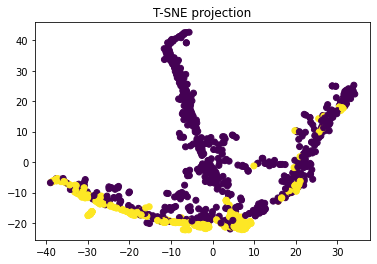

In [ ]:
plt.figure()
plt.scatter(X_LS2[:,0],X_LS2[:,1],c=Y_LS2)
plt.title('T-SNE projection')
plt.show()

In [ ]:
# Train
SVM_TSNE1= None
SVM_TSNE1 = svm.SVC(kernel='rbf',probability=True)
SVM_TSNE1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Evaluate
yy_test=SVM_TSNE1.predict(X_test)
print('SVM',f1_score(y_test+1, yy_test+1))
print('Stupid model always predict 1',f1_score(y_test+1, np.zeros(len(y_test))+1))

ps=SVM_TSNE1.predict(tsne.fit_transform(S_features))
print('Correct prediction about original spammer',sum(ps)/np.shape(S_features)[0])

pl=SVM_TSNE1.predict(tsne.fit_transform(L_features))
print('Correct prediction about original legitimate',1-sum(pl)/np.shape(L_features)[0])

SVM 0.836734693877551
Stupid model always predict 1 0.5925925925925926
Correct prediction about original legitimate 0.0
Correct prediction about original legitimate 0.7887323943661972


In [ ]:
# Predict
U_features1=tsne.fit_transform(U_features)
prediction1=SVM_TSNE1.predict(U_features1)

#### Version 2

In [ ]:
# Preprocessing
smote = SMOTE(kind='svm')#imballanced dataset
X_LS3, Y_LS3 = smote.fit_resample(X_LS,Y_LS)
tsne = TSNE(n_components=2)
X_LS3 = tsne.fit_transform(X_LS3, Y_LS3)
X_LS3, Y_LS3 = shuffle(X_LS3, Y_LS3)#performe algorithm

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

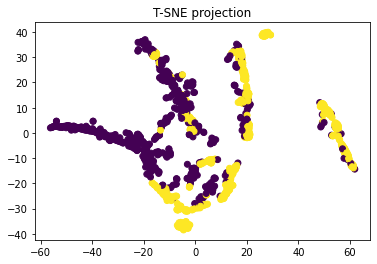

In [ ]:
# Plot new representation space
plt.figure()
plt.scatter(X_LS3[:,0],X_LS3[:,1],c=Y_LS3)
plt.title('T-SNE projection')
plt.show()

In [ ]:
# Train
SVM_TSNE2= None
SVM_TSNE2 = svm.SVC(kernel='rbf')
SVM_TSNE2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Evaluate
yy_test=SVM_TSNE2.predict(X_test)
print('SVM',f1_score(y_test+1, yy_test+1))
print('Stupid model always predict 1',f1_score(y_test+1, np.zeros(len(y_test))+1))

ps=SVM_TSNE2.predict(tsne.fit_transform(S_features))
print('Correct prediction about original spammer',sum(ps)/np.shape(S_features)[0])

pl=SVM_TSNE2.predict(tsne.fit_transform(L_features))
print('Correct prediction about original legitimate',1-sum(pl)/np.shape(L_features)[0])

SVM 0.836734693877551
Stupid model always predict 1 0.5925925925925926
Correct prediction about original legitimate 0.0
Correct prediction about original legitimate 0.772887323943662


In [ ]:
# Predict
U_features2=tsne.fit_transform(U_features)
prediction2=SVM_TSNE2.predict(U_features2)

### Features augmentation

In [ ]:
#Preprocessing
featuresaug=pd.merge(temp1,features)
S_features,L_features,U_features=preprocessing(featuresaug,threshold=0.3)
X_train, X_test, y_train, y_test,X_LS,Y_LS=huge_preprocessing(S_features,L_features,U_features)

Drop out:  ['adjusted_nb_of_uses_of_mention', 'age', 'content_duration_days', 'diversity_index_of_hashtags', 'diversity_index_of_sources', 'diversity_index_of_urls', 'followees_per_followers_sq', 'followers_count_minus_2002', 'friends_count_minus_2002', 'hashtags_used_on_average', 'len_description', 'max_intertweet_times_seconds', 'max_nb_characters_per_tweet', 'max_nb_hashtags_per_tweet', 'max_nb_hashtags_per_word_in_the_tweet', 'max_nb_mentions_per_tweet', 'max_nb_mentions_per_word_in_the_tweet', 'max_nb_symbols_per_word_in_the_tweet', 'max_nb_words_per_tweet', 'mean_nb_characters_per_tweet', 'mean_nb_favourites_per_tweet', 'mean_nb_hashtags_per_tweet', 'mean_nb_hashtags_per_word_in_the_tweet', 'mean_nb_mentions_per_tweet', 'mean_nb_mentions_per_word_in_the_tweet', 'mean_nb_retweets_per_tweet', 'mean_nb_symbols_per_tweet', 'mean_nb_urls_per_tweet', 'mean_nb_urls_per_word_in_the_tweet', 'mean_nb_words_per_tweet', 'median_nb_characters_per_tweet', 'median_nb_favourites_per_tweet', 'med

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
# Train
KNN= None
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Evaluate
yy_test=KNN.predict(X_test)
print('KNN',f1_score(y_test+1, yy_test+1))
print('Stupid model always predict 1',f1_score(y_test+1, np.zeros(len(y_test))+1))

ps=KNN.predict(S_features)
print('Correct prediction about original spammer',sum(ps)/np.shape(S_features)[0])

pl=KNN.predict(L_features)
print('Correct prediction about original legitimate',1-sum(pl)/np.shape(L_features)[0])

KNN 0.9217391304347826
Stupid model always predict 1 0.6896551724137931
Correct prediction about original legitimate 0.9576271186440678
Correct prediction about original legitimate 0.8855633802816901


In [ ]:
# Predict
KKNPprediction=KNN.predict(U_features)

## Result

In [ ]:
print('All our prediction')
print('KNN:\n',KKNprediction)
print('SVM:\n',SVMprediction)
print('T-SNE + SVM:\n',prediction1)
print('T-SNE + SVM bis:\n',prediction2)
print('KNN features augmentation:\n',KKNPprediction)

All our prediction
KNN:
 [0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0]
SVM:
 [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 1 1 0 0 0]
T-SNE + SVM:
 [1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1]
T-SNE + SVM bis:
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 0 0 1 0]
KNN features augmentation:
 [0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0]


Majority vote:

In [ ]:
retour=(KKNPprediction+KKNprediction+0.5*SVMprediction+0.25*prediction1+0.25*prediction2)/3
print('Majority vote:',retour,'\n')
retour=1*(retour>0.5)
print('Result:\n',retour)

Majority vote: [0.08333333 0.91666667 0.5        0.16666667 0.5        0.75
 0.83333333 0.5        0.91666667 0.5        0.83333333 0.66666667
 0.91666667 0.91666667 0.91666667 0.16666667 0.08333333 0.91666667
 0.         0.58333333 0.16666667 0.91666667 0.16666667 0.58333333
 0.91666667 0.83333333 0.58333333 0.16666667 0.16666667 0.33333333
 0.         0.25       0.16666667 0.16666667 0.08333333 0.16666667
 1.         0.08333333 0.16666667 0.16666667 0.16666667 0.08333333
 0.16666667 0.25       0.16666667 0.16666667 0.25       0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.25       0.08333333 0.83333333 0.16666667
 0.16666667 0.16666667 0.         0.16666667 0.16666667 0.16666667
 0.08333333 0.16666667 0.33333333 0.         0.08333333 0.16666667
 0.16666667 0.33333333 0.16666667 0.16666667 0.91666667 0.16666667
 0.08333333 0.16666667 0.08333333] 

Result:
 [0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1

# Final result

In [ ]:
df = {'coded_id':unknown,'label':retour}
data = pd.DataFrame(df)
data.tail()
data.to_csv('coded_ids_labels_test.csv',index = False)